# <p style="text-align:center;#D3D3D3;font-size:44px;font-weight:bolder;padding:0.3em 0 0.5em;border-radius:10px 10px;font-stretch: 125%;margin:0;line-height:115%;">🧱 CONCRETE COMPRESSIVE STRENGTH PREDICTION 🧱</p>

***
🪦 Problem Statement:
=================
The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. 

The strength of the concrete is also a vital aspect in achieving the requisite longevity. 
It will take 28 days to test strength, which is a long period. 

So, what will we do now? We can save a lot of time and effort by using Data Science 
to estimate how much quantity of which raw material we need for acceptable compressive strength
***

❇️ AIM : 

To build a solution that should able to predict the compressive strength of the concrete.(Using Machine Learning)

❇️ APPROACH: 

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. 
           Different machine learning algorithms that’s best fit for the above case will be tried out.

***


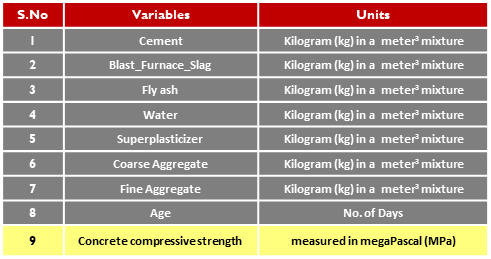

<a id="1"></a>
# <p style="text-align:center; color:#F6F6F6; background-color:#696969; font-size:40px; font-weight:bolder; padding:0.3em 0 0.4em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">IMPORTING LIBRARIES 📚</p>

In [8]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys

import missingno as mno

import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;">LOADING DATA 💾</p>

In [9]:
# loading the dataset
dataset = pd.read_csv("data/concrete_data.csv")

In [10]:
target = dataset['concrete_compressive_strength']
features = dataset.iloc[:-1]

In [11]:
original_dataset = dataset.copy
display(dataset.head())

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> 🔎 DATA EXPLORATION 🔍</p>

In [17]:
# Viewing the duplicate records
duplicates = dataset.duplicated()

In [18]:
# Delete duplicate rows
dataset.drop_duplicates(inplace=True)

In [19]:
print('\n\033[1mINFORMATION    :\033[0m \nAfter dropping the duplicates, the Dataset contains now \nFeatures       =  {}  \nTotal Samples  =  {}'.format(dataset.shape[1], dataset.shape[0]))


INFORMATION    : 
After dropping the duplicates, the Dataset contains now 
Features       =  9  
Total Samples  =  1005


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

1) In the given dataset, 25 duplicate rows were found 
2) All the duplicatie rows were dropped from the dataset
3) Initially the dataset had 1030 rows and now after dropping the dataset has now has 1005 rows. 

lets move on to Data Visualization

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> DATA VISUALIZATION 📈📊 </p>

In [22]:
# Removing outliers by standard methods and Plotting graphs:
df_outliers = pd.DataFrame(dataset.loc[:,])

for col in df_outliers:
  # Using IQR method to define the range of inliners:
  q1, q3, median = dataset[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df_outliers[col] = np.where(df_outliers[col] > upper_limit, median,np.where(
                         df_outliers[col] < lower_limit,median,df_outliers[col]))

In [23]:
dataset = df_outliers.copy()

In [24]:
# Box plots after treating outliers
fig = make_subplots(rows = 2, cols = 5, subplot_titles=tuple(dataset.columns))

for n , feature in enumerate(dataset.columns, start = 1):
    row = (n - 1) // 5 + 1 
    col = (n - 1) % 5 + 1
    fig.add_trace(go.Box(y=dataset[feature], name = feature), row = row, col= col)

fig.update_layout(height = 500, width = 1500, title_text = "____________________________________Box plots after treating outliers__________________________________")
fig.show()


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

most of the outliers have been treated

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> MODEL BUILDING 📈📊 </p>

In [26]:
# splitting into independant and target features

features = dataset.iloc[:, :-1]
target =  dataset['concrete_compressive_strength']# splitting into independant and target features

features = dataset.iloc[:, :-1]
target =  dataset['concrete_compressive_strength']

In [27]:
features.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0


In [28]:
target

0       33.80
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1005, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [30]:
features_scaled = std_scaler.fit_transform(features)

In [31]:
features_scaled

array([[ 2.50611568, -0.83767708, -0.86537497, ...,  0.84630238,
        -1.21385275, -0.14890343],
       [ 2.50611568, -0.83767708, -0.86537497, ...,  1.03974828,
        -1.21385275, -0.14890343],
       [ 0.51651597,  0.83490565, -0.86537497, ..., -0.54650808,
        -2.25469094, -0.14890343],
       ...,
       [-1.24775558,  0.79851964,  0.82684599, ..., -1.05720525,
         0.10623471, -0.14890343],
       [-1.1461182 ,  1.35369973, -0.86537497, ...,  0.19632417,
         0.21920373, -0.14890343],
       [-0.17001579,  0.3419339 ,  0.35470699, ..., -1.41701462,
        -0.12858854, -0.14890343]])

In [32]:
### Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled,target, test_size= 0.3, random_state=40)

In [33]:
print(f'Train dataset shape: {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape: {X_test.shape}, {y_test.shape}')

Train dataset shape: (703, 8), (703,)
Test dataset shape: (302, 8), (302,)


In [34]:
# writting Function to visualize our models performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def PerformanceCalculator(trueVals, predVals, name):
         
    rmse = np.sqrt(mean_squared_error(trueVals, predVals))  # Calculating RMSE
    mae = mean_absolute_error(trueVals, predVals)  # Calculating MAE
    mse = mean_squared_error(trueVals, predVals)  # Calculating MSE
    r2 = r2_score(trueVals, predVals)  # Calculating R2
    
    # Compute absolute error between true and predicted values
    diff = abs(trueVals - predVals)

    # Create a dictionary to store true values, predicted values, and absolute error
    ansFrame = {
        'True C_C_Strength': trueVals,
        'Predicted C_C_Strength': predVals,
        'Absolute error': diff 
    }

    # Create a pandas DataFrame from the dictionary
    ansFrame = pd.DataFrame(ansFrame)


    # Calculate marker sizes based on absolute error
    marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

    # Scatter plot of true vs predicted values with marker sizes based on error
    plt.scatter(ansFrame['True C_C_Strength'], ansFrame['Predicted C_C_Strength'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='turbo', alpha=0.7)

    # Plot the line where true values equal predicted values for reference
    plt.plot(ansFrame['True C_C_Strength'], ansFrame['True C_C_Strength'], color='red', label='True = Predicted')

    plt.xlabel('True Concrete Compressive Strength')
    plt.ylabel('Predicted Concrete Compressive Strength ')
    plt.colorbar(label='Absolute Error')
    plt.title('Performance Metrics for {}'.format(name))
    plt.legend()
    plt.grid(True)
    plt.show()
    return rmse, mae, mse, r2


d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



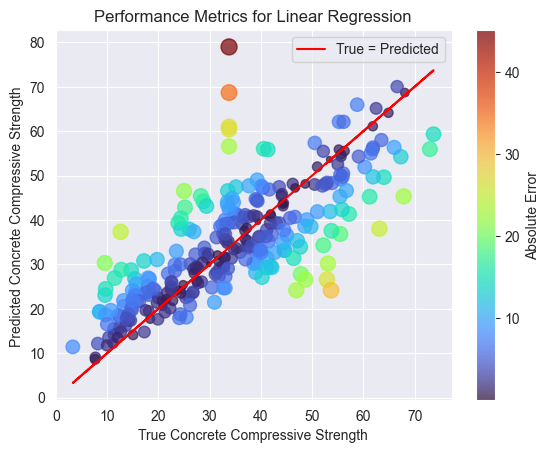

RMSE for Linear Regression  : 9.390438423674128
MAE for Linear Regression   : 6.860813299999851
MSE for Linear Regression   : 88.18033378881543
R2 for Linear Regression    : 0.6222711219096093


In [35]:
# lets start our Analysis with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Linear Regression')
print("RMSE for Linear Regression  :", rmse)
print("MAE for Linear Regression   :", mae)
print("MSE for Linear Regression   :", mse)
print("R2 for Linear Regression    :", r2)

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



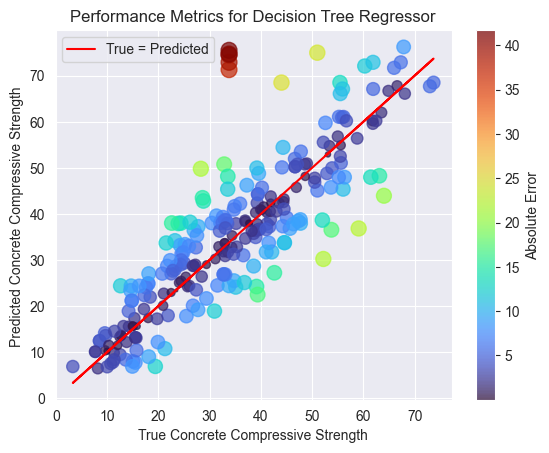

RMSE for Decision Tree Regressor  : 8.561001938690383
MAE for Decision Tree Regressor   : 5.511291390728476
MSE for Decision Tree Regressor   : 73.29075419426049
R2 for Decision Tree Regressor    : 0.6860520575653799


In [36]:
# lets do one better by using a decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Decision Tree Regressor')
print("RMSE for Decision Tree Regressor  :", rmse)
print("MAE for Decision Tree Regressor   :", mae)
print("MSE for Decision Tree Regressor   :", mse)
print("R2 for Decision Tree Regressor    :", r2)

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



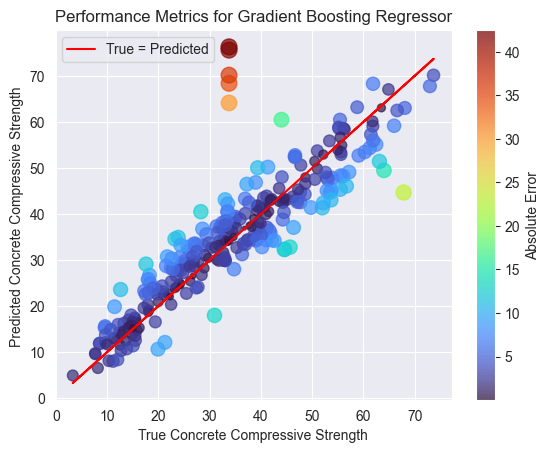

RMSE for Gradient Boosting Regressor  : 7.05217885762246
MAE for Gradient Boosting Regressor   : 4.55491958950896
MSE for Gradient Boosting Regressor   : 49.73322663989722
R2 for Gradient Boosting Regressor    : 0.7869629758093949


In [37]:
# lets Try gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Gradient Boosting Regressor')
print("RMSE for Gradient Boosting Regressor  :", rmse)
print("MAE for Gradient Boosting Regressor   :", mae)
print("MSE for Gradient Boosting Regressor   :", mse)
print("R2 for Gradient Boosting Regressor    :", r2)

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



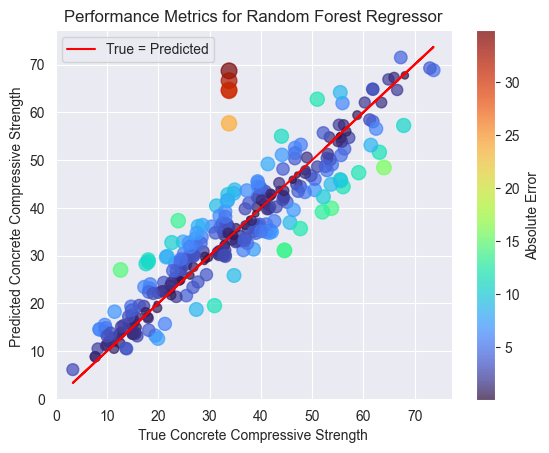

RMSE for Random Forest Regressor  : 6.334932940228753
MAE for Random Forest Regressor   : 4.239324978319144
MSE for Random Forest Regressor   : 40.13137535719531
R2 for Random Forest Regressor    : 0.8280934224381397


In [38]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Random Forest Regressor')
print("RMSE for Random Forest Regressor  :", rmse)
print("MAE for Random Forest Regressor   :", mae)
print("MSE for Random Forest Regressor   :", mse)
print("R2 for Random Forest Regressor    :", r2)

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



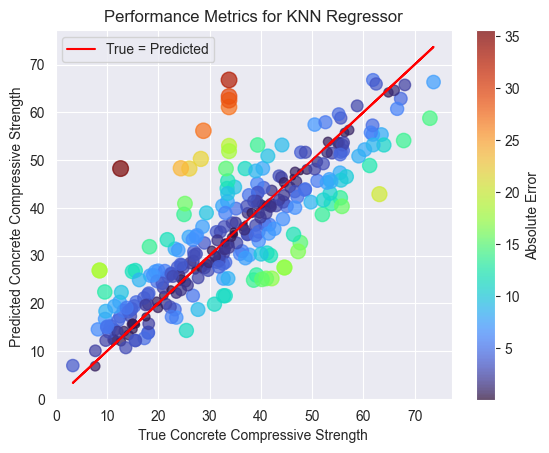

RMSE for KNN Regressor  : 8.303886082204233
MAE for KNN Regressor   : 5.885437086092716
MSE for KNN Regressor   : 68.95452406622516
R2 for KNN Regressor    : 0.7046267132854096


In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN regressor with desired parameters
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'KNN Regressor')
print("RMSE for KNN Regressor  :", rmse)
print("MAE for KNN Regressor   :", mae)
print("MSE for KNN Regressor   :", mse)
print("R2 for KNN Regressor    :", r2)

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



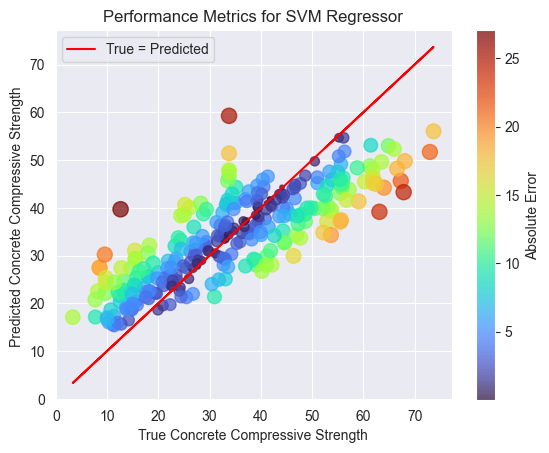

RMSE for SVM Regressor  : 9.124020201923518
MAE for SVM Regressor   : 7.199209756348265
MSE for SVM Regressor   : 83.24774464510847
R2 for SVM Regressor    : 0.6434003384058344


In [40]:
from sklearn.svm import SVR

# Instantiate SVM regressor with desired parameters
svm = SVR(kernel='rbf')  # You can choose different kernels and adjust other parameters as needed

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
predictions = svm.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'SVM Regressor')
print("RMSE for SVM Regressor  :", rmse)
print("MAE for SVM Regressor   :", mae)
print("MSE for SVM Regressor   :", mse)
print("R2 for SVM Regressor    :", r2)


d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



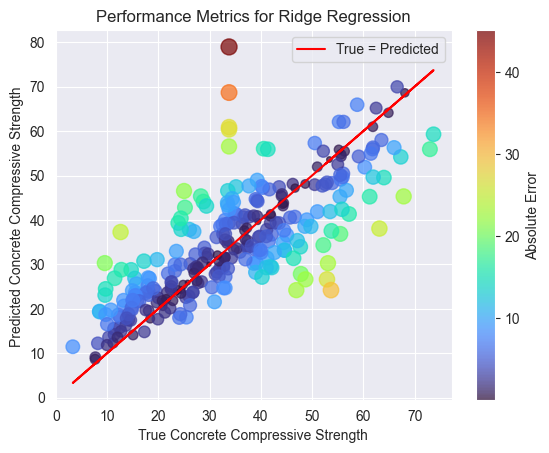

RMSE for Ridge Regression  : 9.387114465100682
MAE for Ridge Regression   : 6.86237124264635
MSE for Ridge Regression   : 88.11791798090246
R2 for Ridge Regression    : 0.6225384859814503


In [41]:
from sklearn.linear_model import Ridge

# Instantiate Ridge regressor with desired parameters
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
predictions = ridge.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Ridge Regression')
print("RMSE for Ridge Regression  :", rmse)
print("MAE for Ridge Regression   :", mae)
print("MSE for Ridge Regression   :", mse)
print("R2 for Ridge Regression    :", r2)


d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



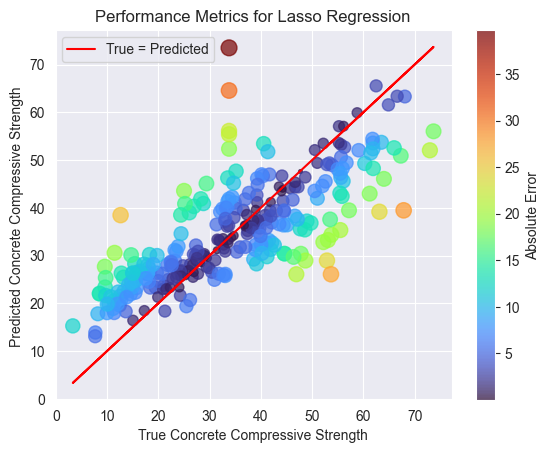

RMSE for Lasso Regression  : 9.60623228483026
MAE for Lasso Regression   : 7.417111137358896
MSE for Lasso Regression   : 92.2796987101152
R2 for Lasso Regression    : 0.6047111009154265


In [42]:
from sklearn.linear_model import Lasso

# Instantiate Lasso regressor with desired parameters
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
predictions = lasso.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Lasso Regression')
print("RMSE for Lasso Regression  :", rmse)
print("MAE for Lasso Regression   :", mae)
print("MSE for Lasso Regression   :", mse)
print("R2 for Lasso Regression    :", r2)

In [43]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting Regr': GradientBoostingRegressor(),
    'Random Forest Regr': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVM Regressor': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Create empty lists to store performance metrics
model_names = []
rmse_values = []
mae_values = []
mse_values = []
r2_values = []

# Function to calculate and append metrics to the lists
def add_metrics_to_lists(model_name, trueVals, predVals):
    global model_names, rmse_values, mae_values, mse_values, r2_values
    rmse = mean_squared_error(trueVals, predVals, squared=False)
    mae = mean_absolute_error(trueVals, predVals)
    mse = mean_squared_error(trueVals, predVals)
    r2 = r2_score(trueVals, predVals)
    model_names.append(model_name)
    rmse_values.append(rmse)
    mae_values.append(mae)
    mse_values.append(mse)
    r2_values.append(r2)

# Assuming you have X_train, y_train, X_test, y_test defined

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    add_metrics_to_lists(model_name, y_test, predictions)

# Create DataFrame from lists
metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
})

# Display the DataFrame
metrics_df


d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared

,Model,RMSE,MAE,MSE,R2
0,Linear Regression,9.390438,6.860813,88.180334,0.622271
1,Decision Tree,8.589235,5.559062,73.774962,0.683978
2,Gradient Boosting Regr,7.035415,4.534442,49.497071,0.787975
3,Random Forest Regr,6.439439,4.268603,41.466376,0.822375
4,KNN Regressor,8.303886,5.885437,68.954524,0.704627
5,SVM Regressor,9.124020,7.199210,83.247745,0.643400
6,Ridge Regression,9.387114,6.862371,88.117918,0.622538
7,Lasso Regression,9.606232,7.417111,92.279699,0.604711


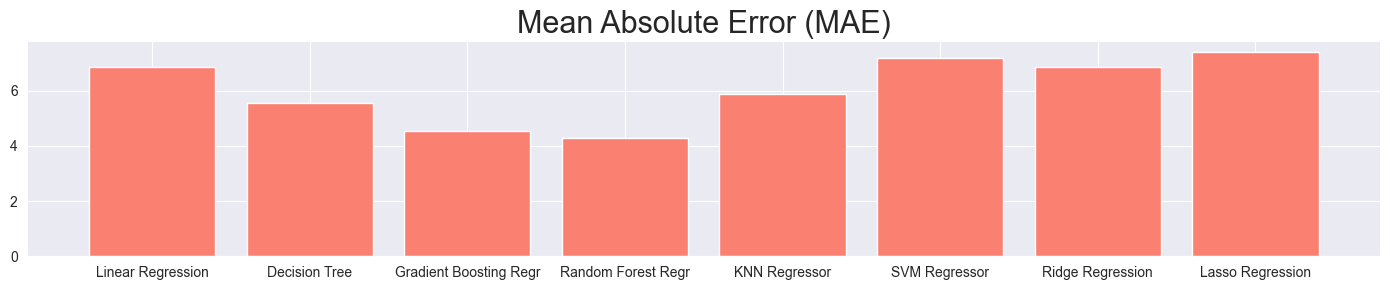

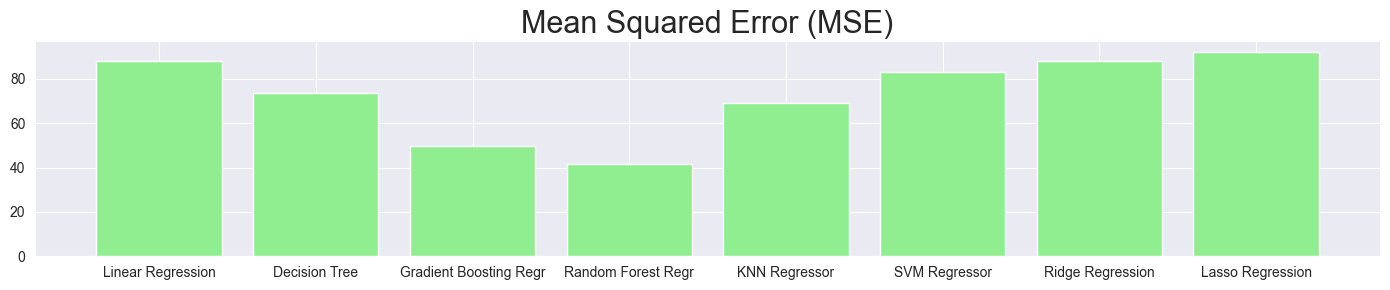

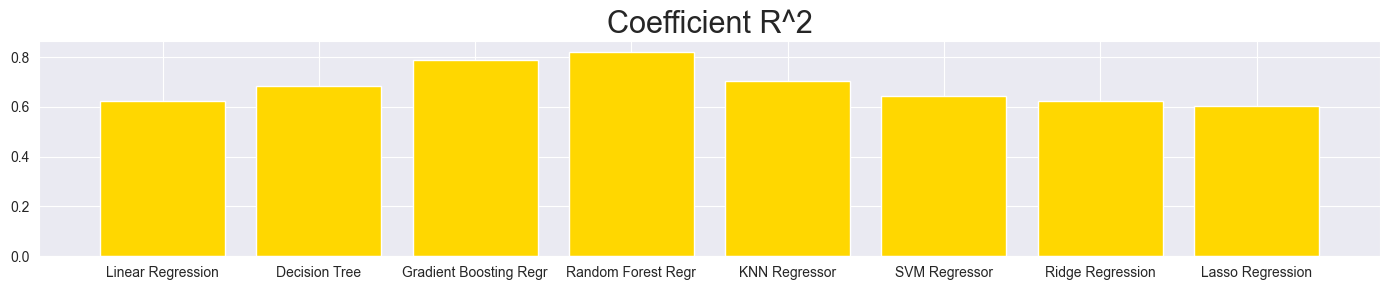

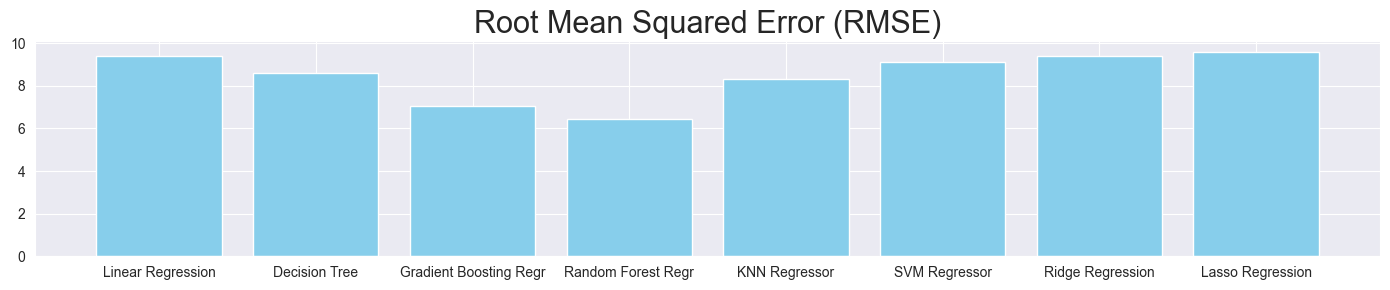

In [44]:
# Create a figure and set its size
plt.figure(figsize=(14, 3))

# Plot MAE
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='salmon')
plt.title('Mean Absolute Error (MAE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Create a figure and set its size
plt.figure(figsize=(14, 3))
# Plot MSE

plt.bar(metrics_df['Model'], metrics_df['MSE'], color='lightgreen')
plt.title('Mean Squared Error (MSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()


# Create a figure and set its size
plt.figure(figsize=(14, 3))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='gold')
plt.title('Coefficient R^2', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Create a figure and set its size
plt.figure(figsize=(14, 3))

# Plot RMSE
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
plt.title('Root Mean Squared Error (RMSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
n_estimators = [100, 200,  500]
max_depths = [30, 50, 70]
min_samples_leafs = [2, 5, 10]
test_results = []

for estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs: 
            rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_jobs=-1, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            
            # Calculating evaluation metrics
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            
            # Appending results
            test_results.append((estimator, max_depth, min_samples_leaf, r2, mse, mae, rmse))
            
            print("Number of estimators:", estimator, "Max depth:", max_depth, "Min leafs:", min_samples_leaf, "R2 Score:", r2, "MSE:", mse, "MAE:", mae, "RMSE:", rmse)

Number of estimators: 100 Max depth: 30 Min leafs: 2 R2 Score: 0.8294669075615015 MSE: 39.81073697433109 MAE: 4.210056539559595 RMSE: 6.3095750232746335
Number of estimators: 100 Max depth: 30 Min leafs: 5 R2 Score: 0.8138338920542305 MSE: 43.46024487673459 MAE: 4.681028168512908 RMSE: 6.592438462112073
Number of estimators: 100 Max depth: 30 Min leafs: 10 R2 Score: 0.77076934022659 MSE: 53.5136105972087 MAE: 5.474048081790911 RMSE: 7.315299761268071
Number of estimators: 100 Max depth: 50 Min leafs: 2 R2 Score: 0.8294669075615014 MSE: 39.8107369743311 MAE: 4.210056539559594 RMSE: 6.309575023274634
Number of estimators: 100 Max depth: 50 Min leafs: 5 R2 Score: 0.8138338920542304 MSE: 43.4602448767346 MAE: 4.681028168512908 RMSE: 6.5924384621120735
Number of estimators: 100 Max depth: 50 Min leafs: 10 R2 Score: 0.77076934022659 MSE: 53.51361059720869 MAE: 5.474048081790911 RMSE: 7.31529976126807
Number of estimators: 100 Max depth: 70 Min leafs: 2 R2 Score: 0.8294669075615014 MSE: 39.81

In [46]:
# Define column names
columns = ['Estimator', 'Max Depth', 'Min Samples Leaf', 'R2 Score', 'MSE', 'MAE', 'RMSE']

# Convert list to DataFrame
test_results_df = pd.DataFrame(test_results, columns=columns)

# Print the DataFrame
test_results_df

,Estimator,Max Depth,Min Samples Leaf,R2 Score,MSE,MAE,RMSE
0,100,30,2,0.829467,39.810737,4.210057,6.309575
1,100,30,5,0.813834,43.460245,4.681028,6.592438
2,100,30,10,0.770769,53.513611,5.474048,7.315300
3,100,50,2,0.829467,39.810737,4.210057,6.309575
4,100,50,5,0.813834,43.460245,4.681028,6.592438
5,100,50,10,0.770769,53.513611,5.474048,7.315300
6,100,70,2,0.829467,39.810737,4.210057,6.309575
7,100,70,5,0.813834,43.460245,4.681028,6.592438
8,100,70,10,0.770769,53.513611,5.474048,7.315300
9,200,30,2,0.831345,39.372359,4.219989,6.274740


In [47]:
ylab = y_test  # True target values
predVals = rf.predict(X_test)  # Predicted target values using Random Forest model

# Compute absolute error between true and predicted values
diff = abs(ylab - predVals)

# Create a dictionary to store true values, predicted values, and absolute error
ansFrame = {
    'True Tc': ylab,
    'Predicted Tc': predVals,
    'Absolute error': diff
}

# Create a pandas DataFrame from the dictionary
ansFrame = pd.DataFrame(ansFrame)

# Display the first 50 rows of the DataFrame
ansFrame


,True Tc,Predicted Tc,Absolute error
767,31.35,43.793848,12.443848
518,23.25,33.131331,9.881331
978,28.99,28.928422,0.061578
929,21.91,20.799060,1.110940
71,28.80,23.894828,4.905172
...,...,...,...
249,13.82,12.351441,1.468559
874,36.80,37.240048,0.440048
579,22.63,34.375902,11.745902
624,27.53,32.713666,5.183666


d:\DATA\iNeuron\MLproject\Concrete\venv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



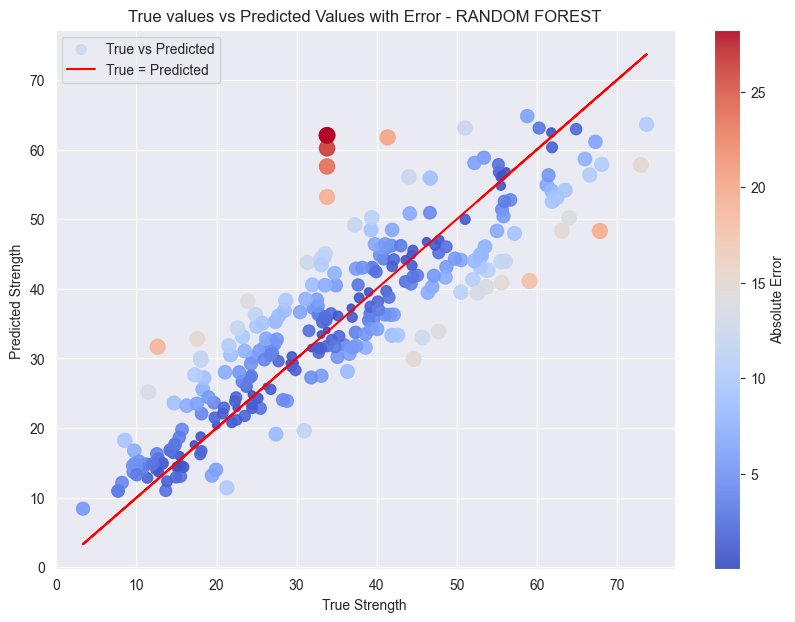

In [48]:
plt.figure(figsize=(10, 7))
# Calculate marker sizes based on absolute error
marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

# Scatter plot of true vs predicted values with marker sizes based on error
plt.scatter(ansFrame['True Tc'], ansFrame['Predicted Tc'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='coolwarm', alpha=0.9, label='True vs Predicted')

# Plot the line where true values equal predicted values for reference
plt.plot(ansFrame['True Tc'], ansFrame['True Tc'], color='red', label='True = Predicted')

plt.xlabel('True Strength')
plt.ylabel('Predicted Strength ')
plt.title('True values vs Predicted Values with Error - RANDOM FOREST')
plt.colorbar(label='Absolute Error')
plt.legend()
plt.show()